**Magic Data Set**


Importing the data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pd.read_csv("magic04.data") #reading the data
col = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"] #Adding the column labels 
df = pd.read_csv("magic04.data", names=col) #Assigning the labels 
df.head() #Shows first 5 data 


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique() #Unique showcases the unique value 

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int) #As the class data variables is either g or h we are converting into numbers
df["class"].unique()


array([1, 0])

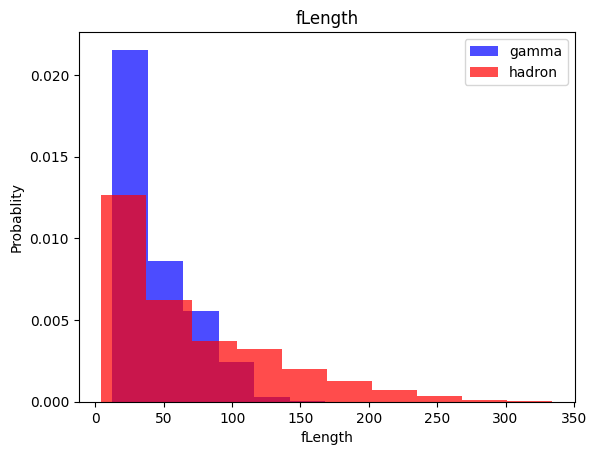

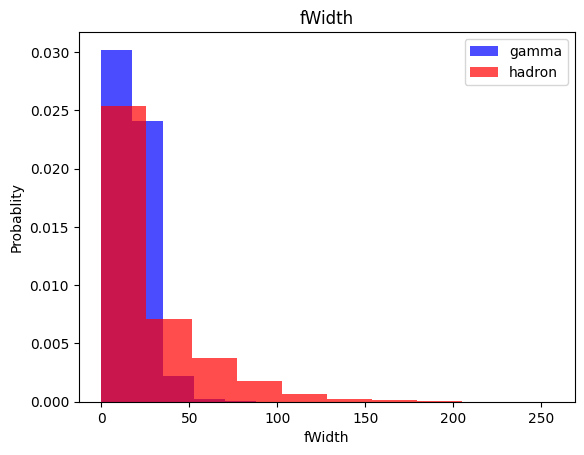

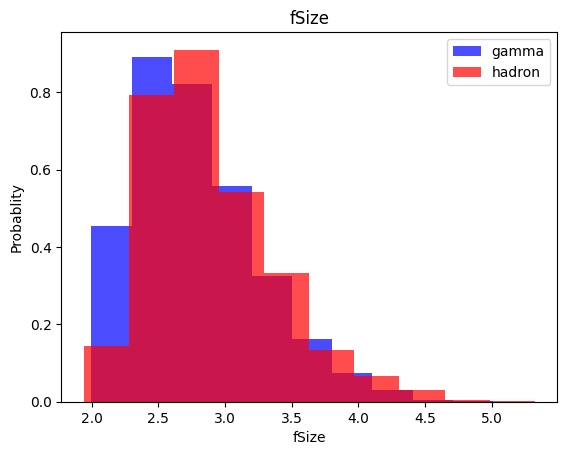

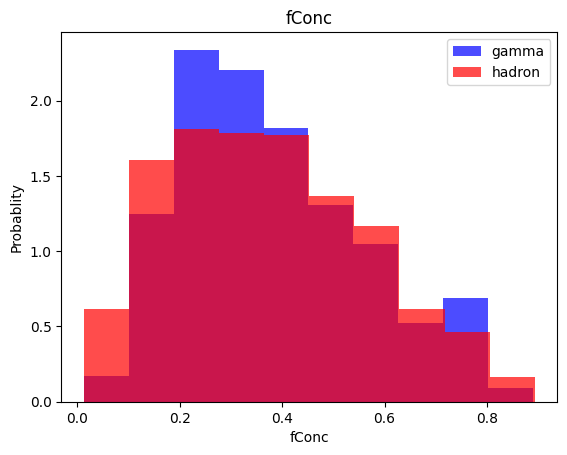

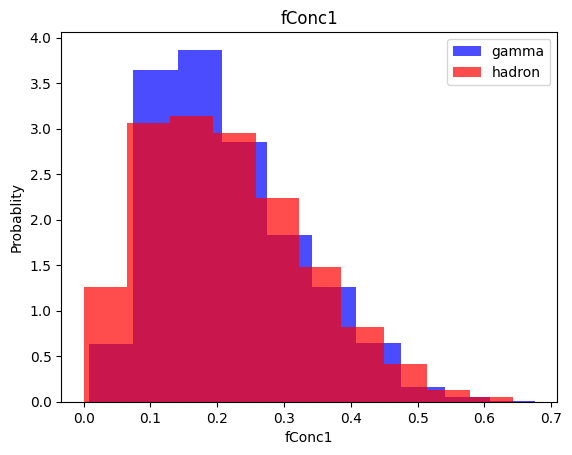

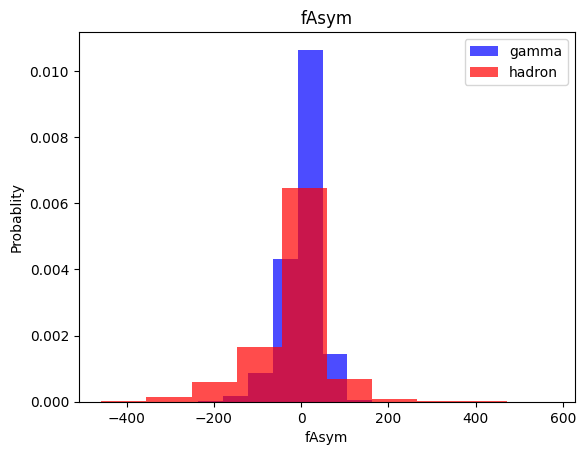

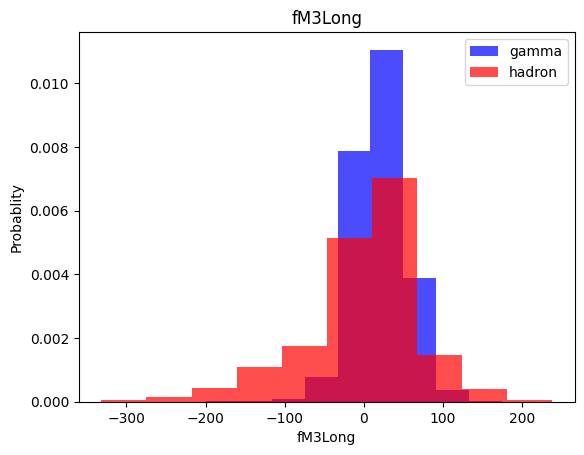

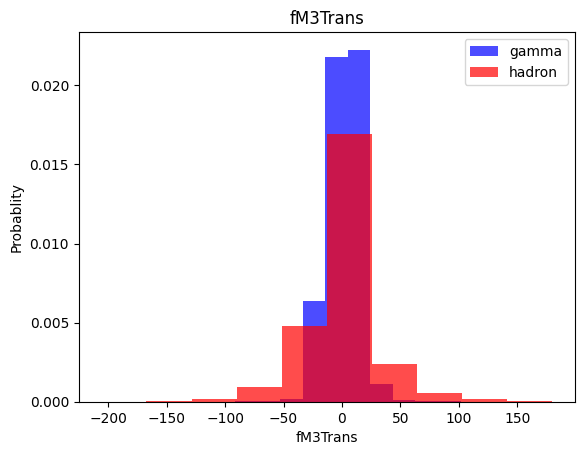

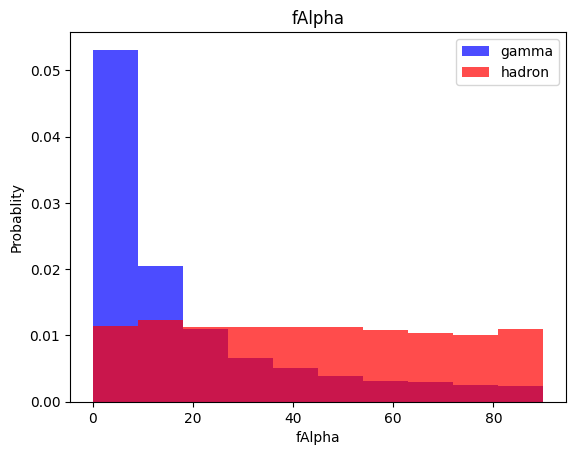

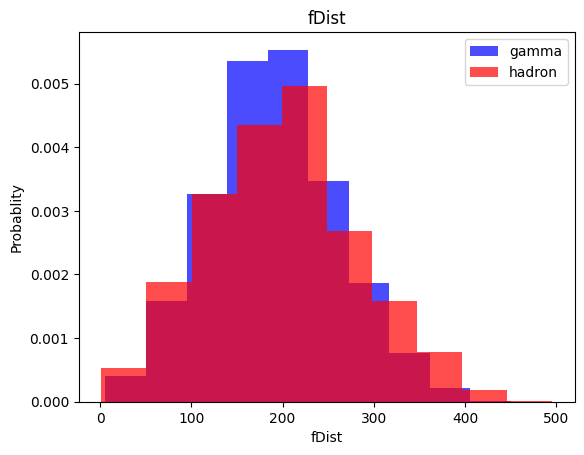

In [ ]:
for label in col[:-1]:  #In the columns here we will look at the data till the last column ie class
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probablity")
    plt.xlabel(label)
    plt.legend()
    plt.show()



#Train Validation and Test Datasets

In [ ]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #Here we are just spliting the data set into specific models. Split is use to np.split is used to split the data set we also use sample() which provides with random data  

The scale of the data points highly varries so to overcome that we will scale them so that they are relative to the mean and standard deviation of that column 

In [ ]:
def scale_ds(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values #Values till the last column
  y = dataframe[dataframe.columns[-1]].values

  #Import Standard scaler for sklearn
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #Reshape y into 2d array 
  #We are going to use oversampler to equate the number of data points for both hadron and gamma
  #Import RandomOverSampler
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)


  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y


In [ ]:
train, x_train, y_train = scale_ds(train, oversample=True)
validation, x_validation, y_validation = scale_ds(validation, oversample=True)
test, x_test, y_test = scale_ds(test, oversample=False)

**KNN K-Nearest Neighbor**

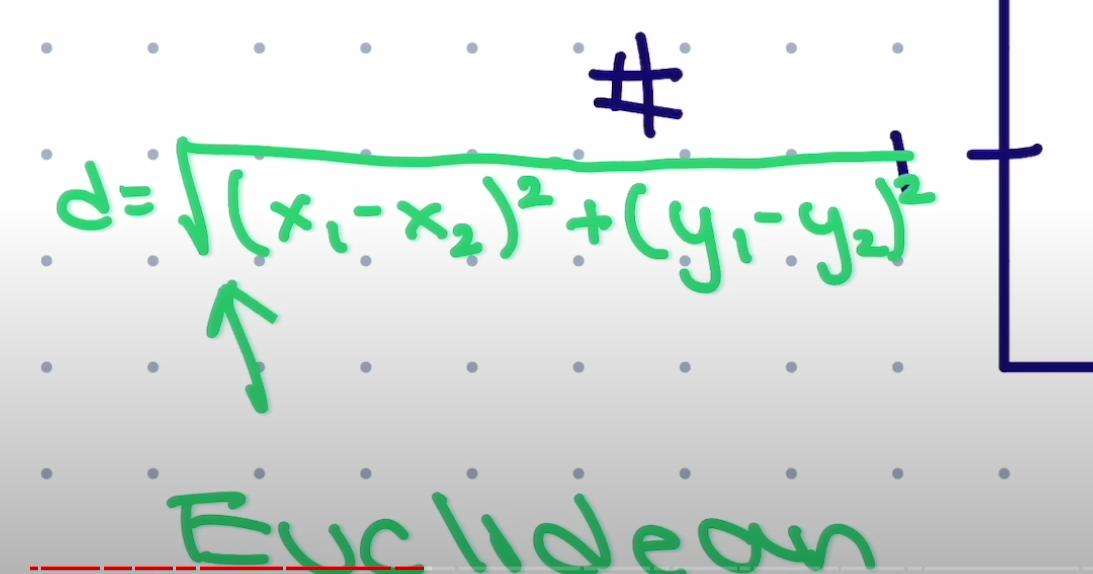

Eulidean Distance is the distance from the chosen sample labe to other near sample labels

In [ ]:
#To use kNN We can easily import it from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
#Creating KNN Model (Using 1 Neighbor)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
#Use classification report to check the accuracy
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.76      0.67      0.72      1355
           1       0.83      0.89      0.86      2449

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
#Creating KNN Model (Using 7 Neighbor)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy_7 = classification_report(y_test, y_pred)
print(accuracy_7)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1355
           1       0.85      0.87      0.86      2449

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
accuracy_nb = classification_report(y_test, y_pred)
print(accuracy_nb)

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1355
           1       0.73      0.90      0.80      2449

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



**Log Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train, y_train)

In [ ]:
y_pred = lr_model.predict(x_test)
accuracy_lr = classification_report(y_test, y_pred)
print(accuracy_lr)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1355
           1       0.84      0.82      0.83      2449

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy_svm = classification_report(y_test, y_pred)
print(accuracy_svm)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1355
           1       0.88      0.90      0.89      2449

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  
  plt.show()



In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                 metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose=0
  )

  return nn_model, history




16 nodes, dropout 0, lr 0.01, batch size 32


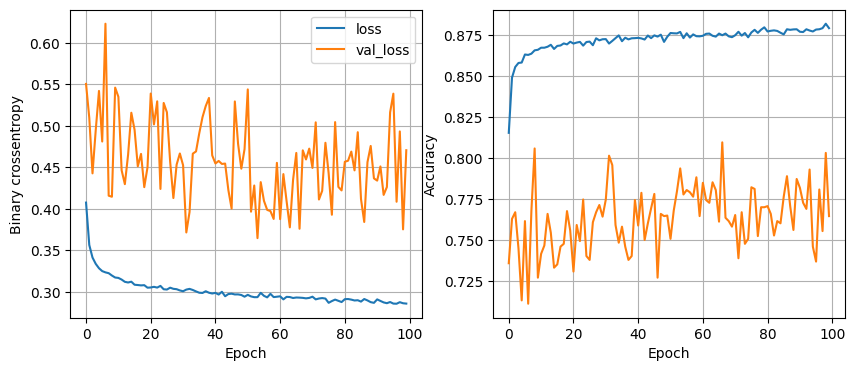

155/155 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8407
16 nodes, dropout 0, lr 0.01, batch size 64


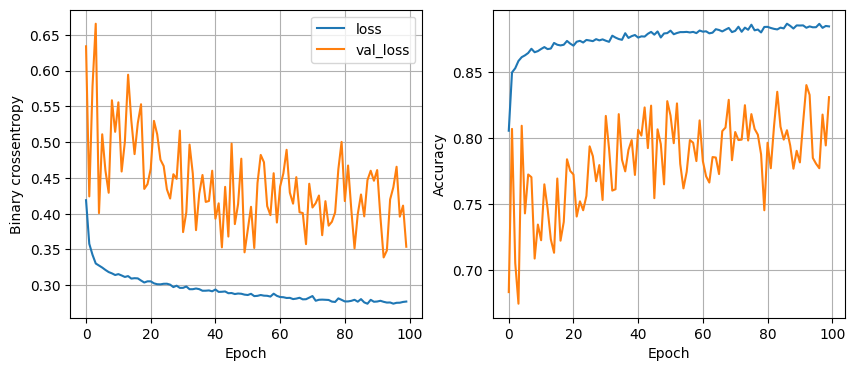

155/155 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8556
16 nodes, dropout 0, lr 0.01, batch size 128


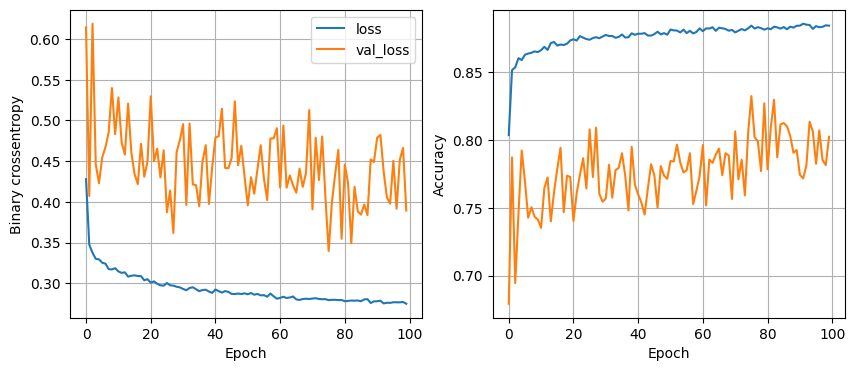

155/155 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8479
16 nodes, dropout 0, lr 0.005, batch size 32


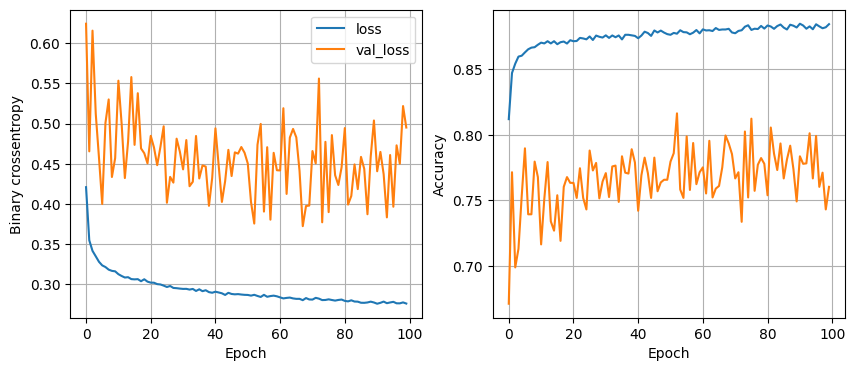

155/155 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8411
16 nodes, dropout 0, lr 0.005, batch size 64


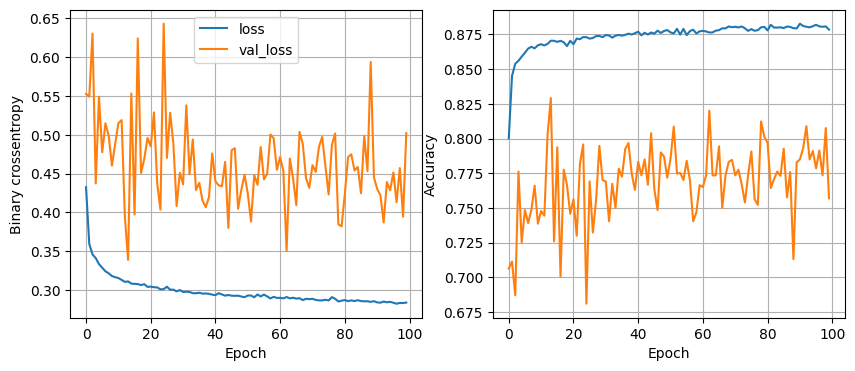

155/155 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8360
16 nodes, dropout 0, lr 0.005, batch size 128


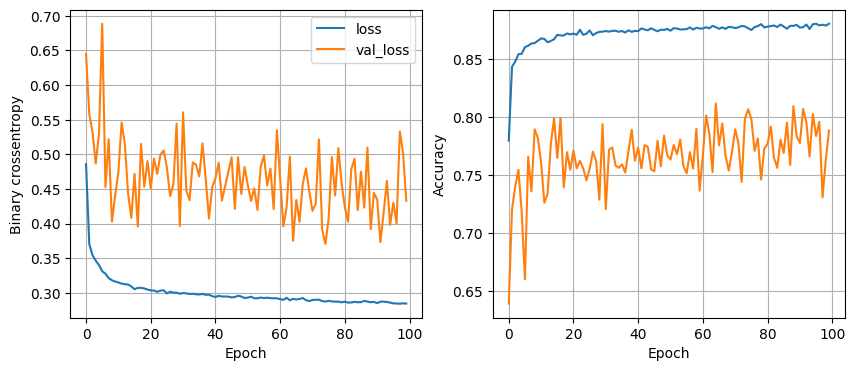

155/155 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8429
16 nodes, dropout 0, lr 0.001, batch size 32


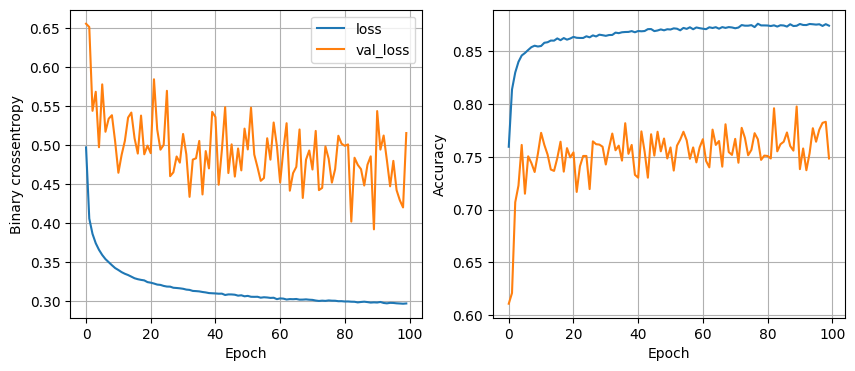

155/155 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8368
16 nodes, dropout 0, lr 0.001, batch size 64


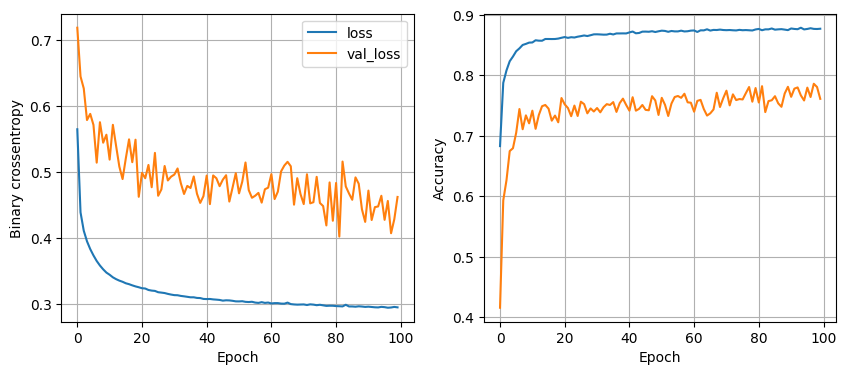

155/155 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8443
16 nodes, dropout 0, lr 0.001, batch size 128


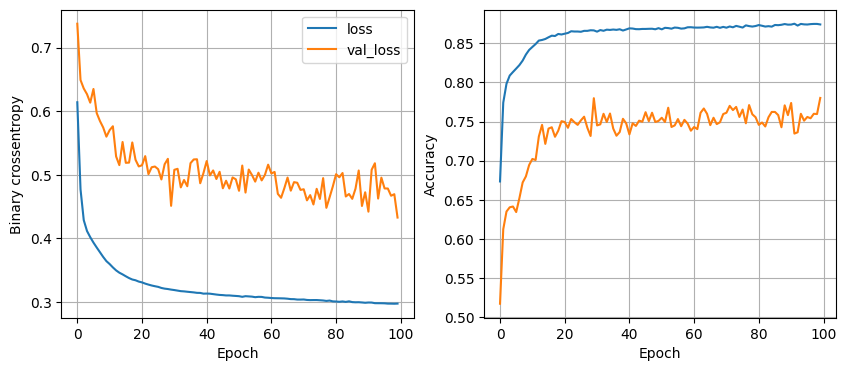

155/155 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8427
16 nodes, dropout 0.2, lr 0.01, batch size 32


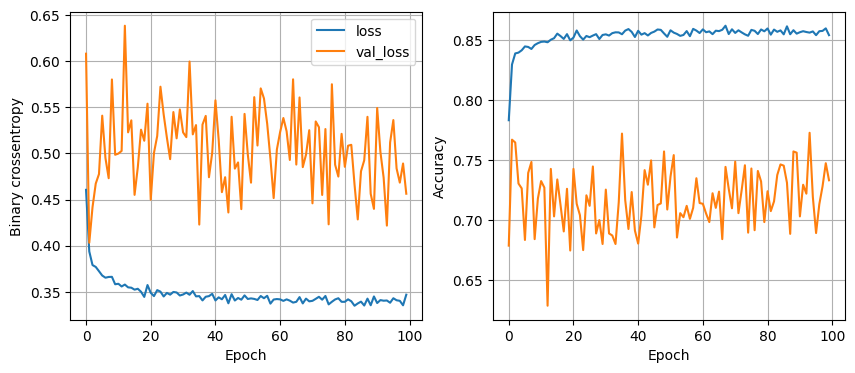

155/155 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8376
16 nodes, dropout 0.2, lr 0.01, batch size 64


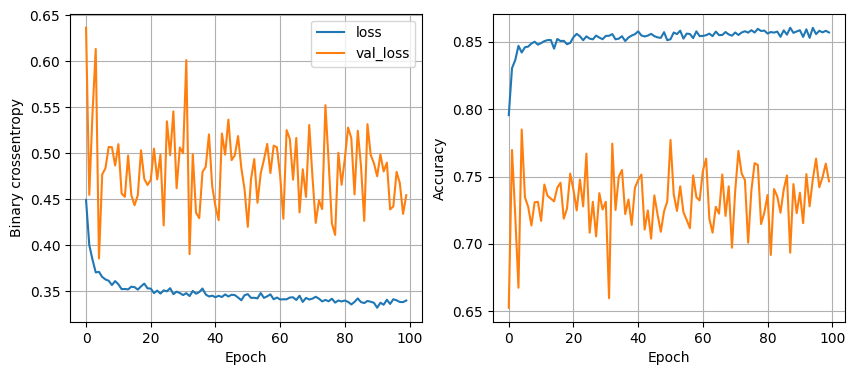

155/155 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8392
16 nodes, dropout 0.2, lr 0.01, batch size 128


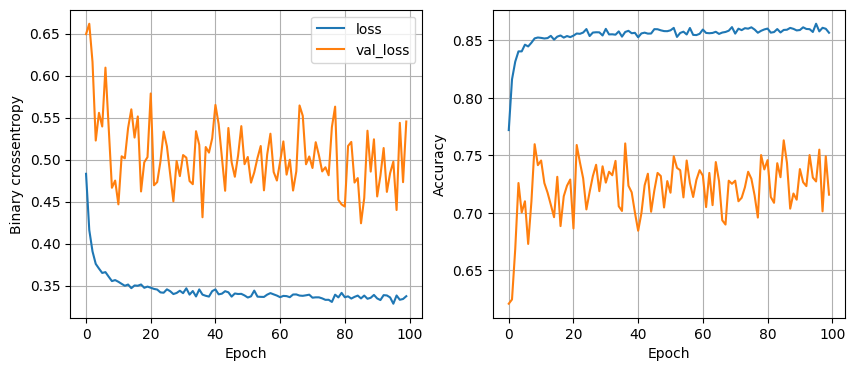

155/155 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8334
16 nodes, dropout 0.2, lr 0.005, batch size 32


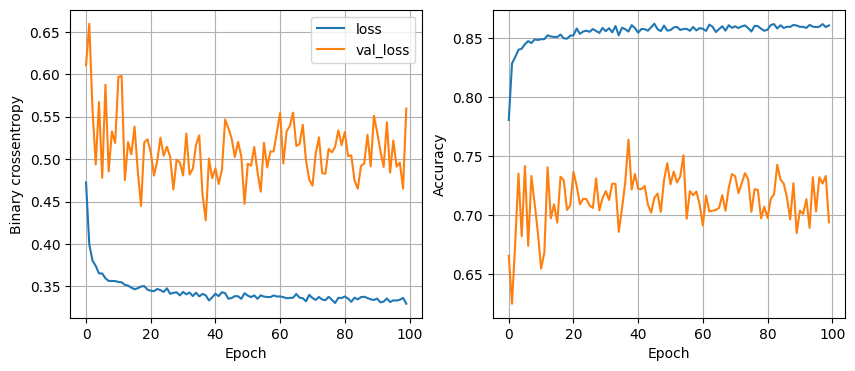

155/155 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8253
16 nodes, dropout 0.2, lr 0.005, batch size 64


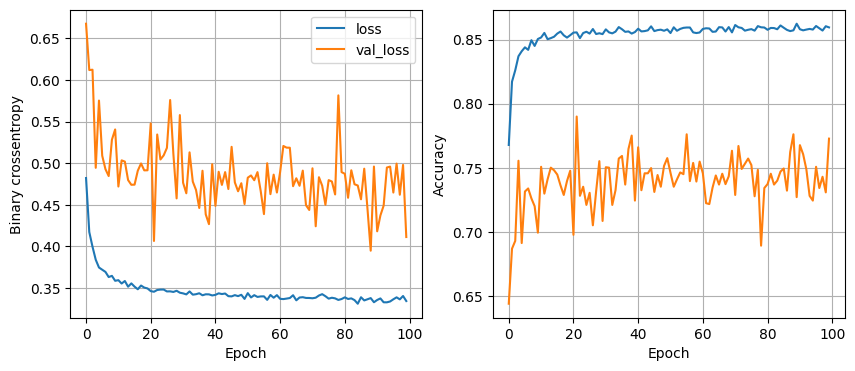

155/155 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8459
16 nodes, dropout 0.2, lr 0.005, batch size 128


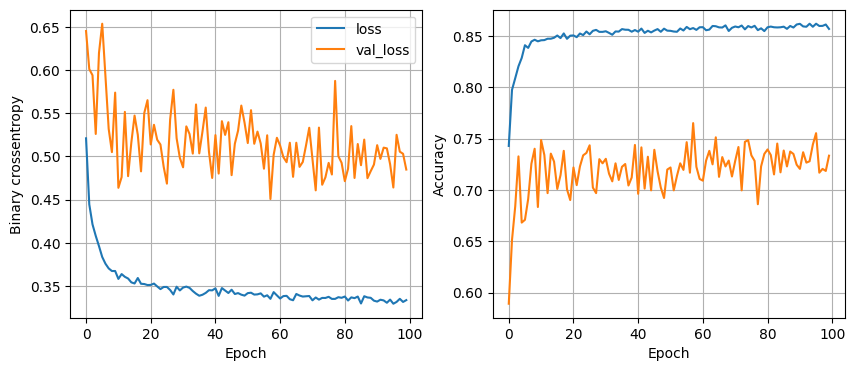

155/155 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8372
16 nodes, dropout 0.2, lr 0.001, batch size 32


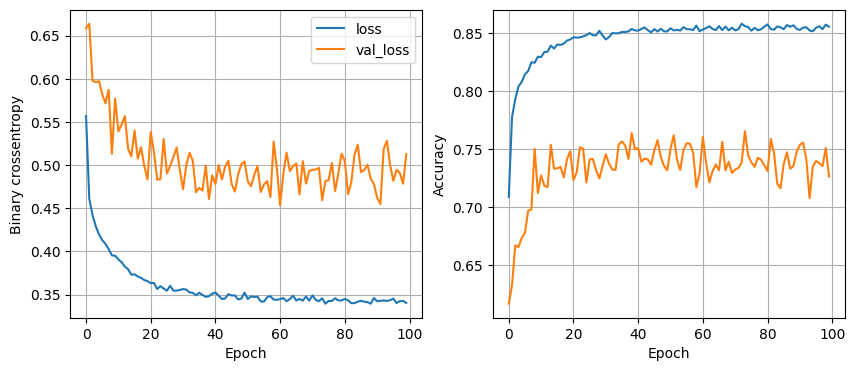

155/155 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8372
16 nodes, dropout 0.2, lr 0.001, batch size 64


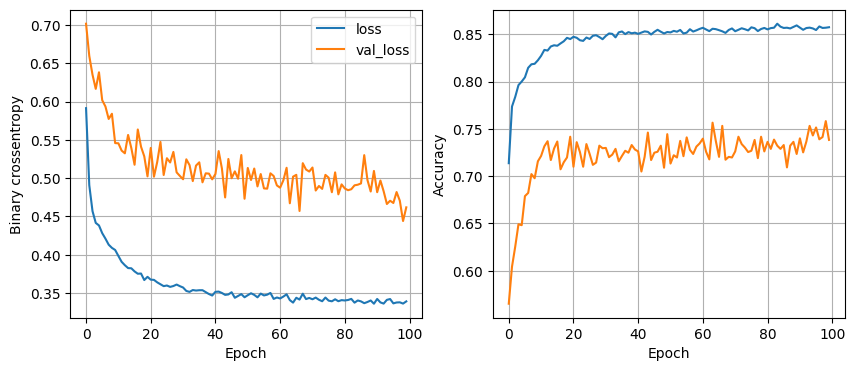

155/155 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8411
16 nodes, dropout 0.2, lr 0.001, batch size 128


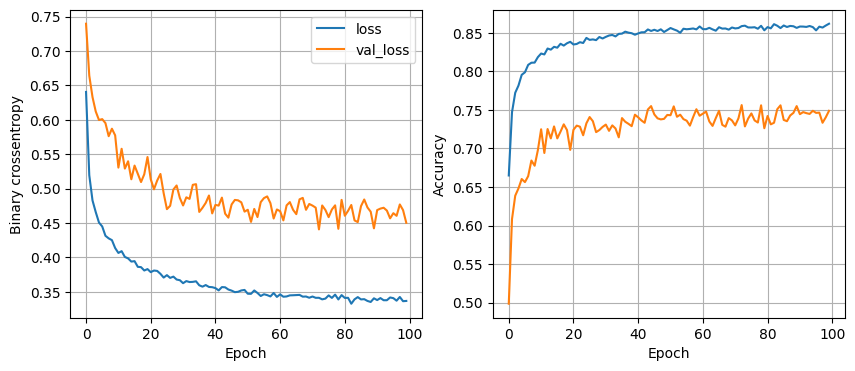

155/155 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8435
32 nodes, dropout 0, lr 0.01, batch size 32


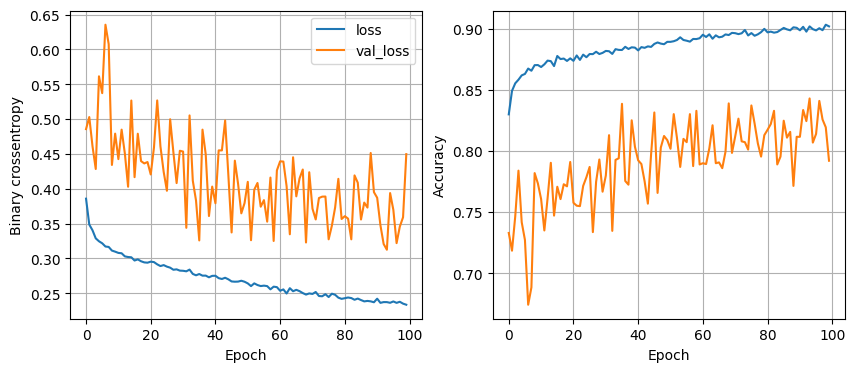

155/155 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.8350
32 nodes, dropout 0, lr 0.01, batch size 64


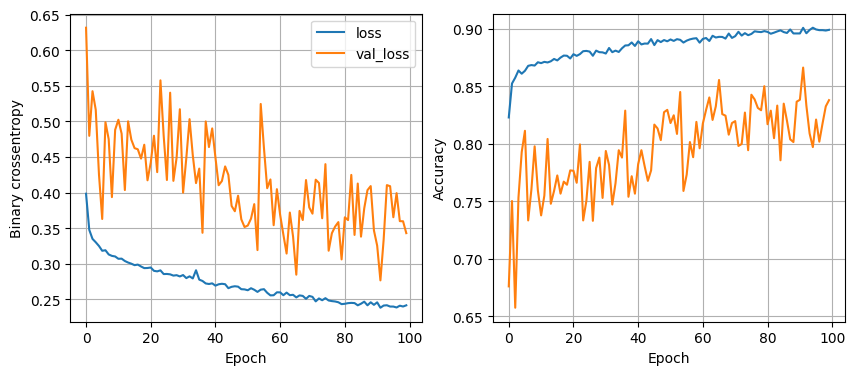

155/155 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8386
32 nodes, dropout 0, lr 0.01, batch size 128


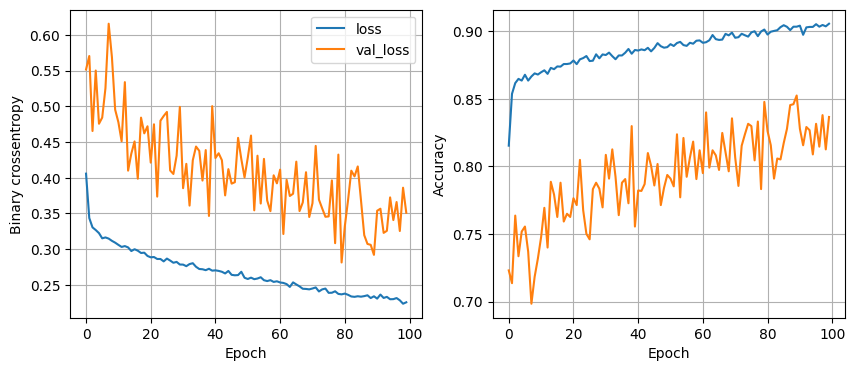

155/155 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8314
32 nodes, dropout 0, lr 0.005, batch size 32


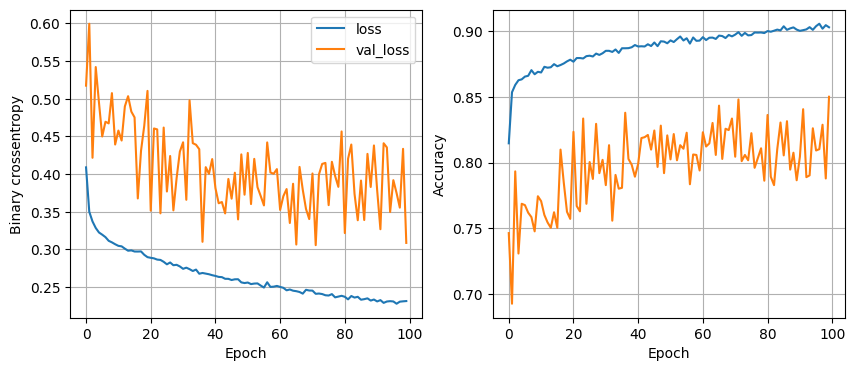

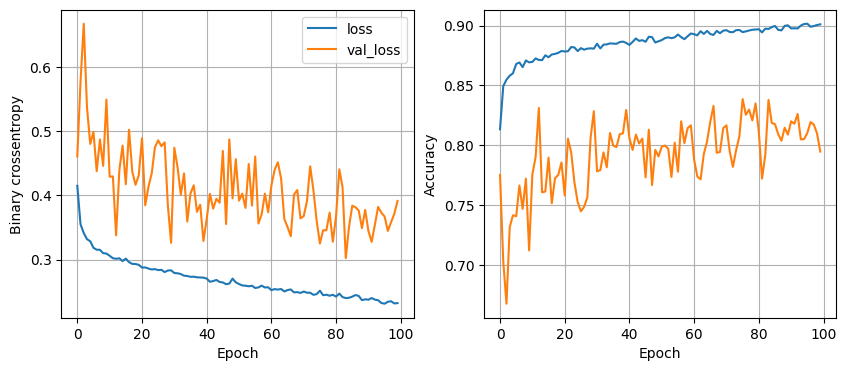

155/155 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8356
32 nodes, dropout 0, lr 0.005, batch size 128


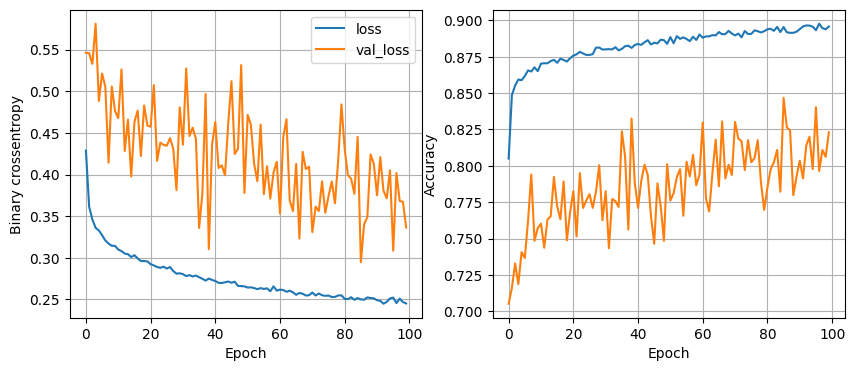

155/155 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8384
32 nodes, dropout 0, lr 0.001, batch size 32


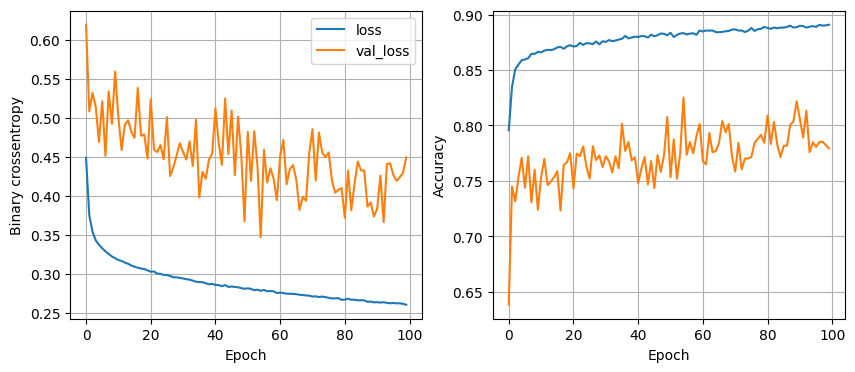

155/155 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8459
32 nodes, dropout 0, lr 0.001, batch size 64


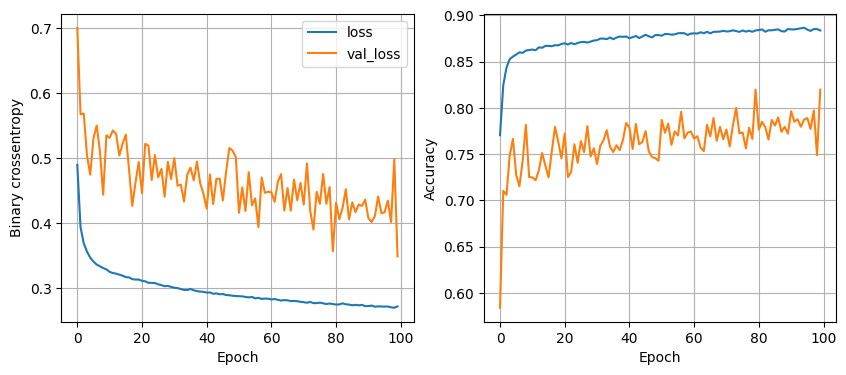

155/155 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8491
32 nodes, dropout 0, lr 0.001, batch size 128


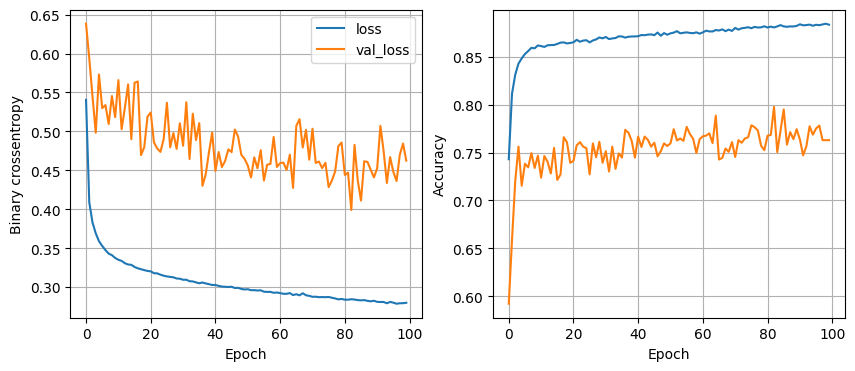

155/155 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8405
32 nodes, dropout 0.2, lr 0.01, batch size 32


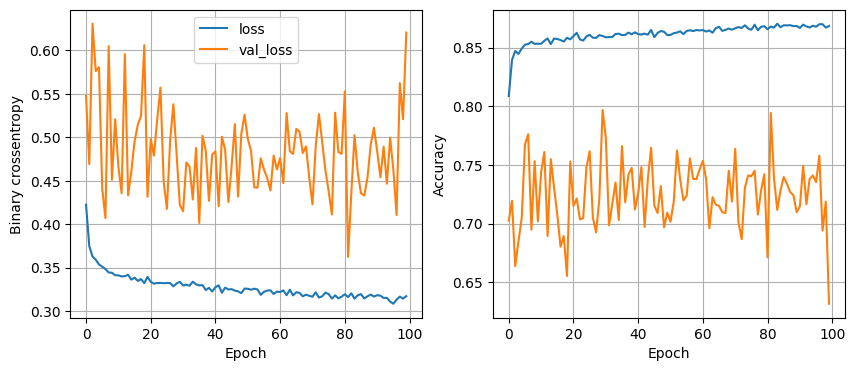

155/155 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8046
32 nodes, dropout 0.2, lr 0.01, batch size 64


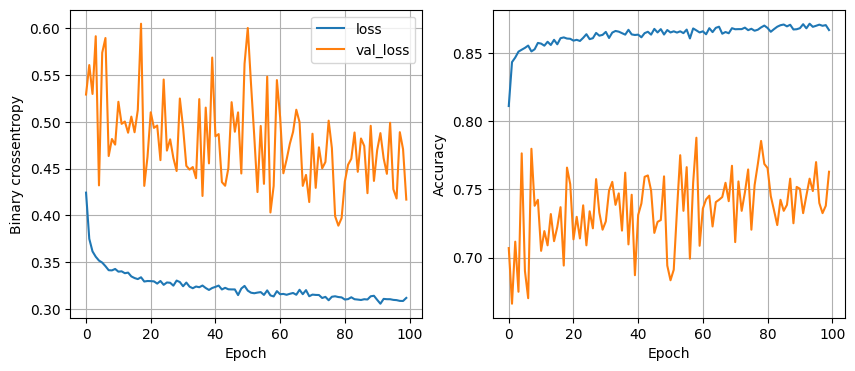

155/155 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8467
32 nodes, dropout 0.2, lr 0.01, batch size 128


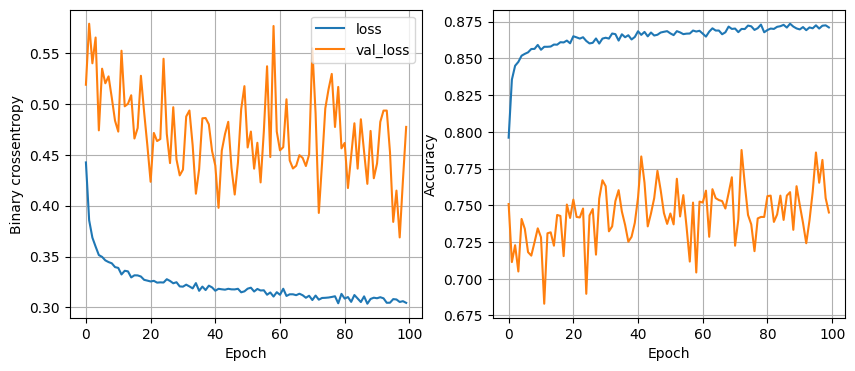

155/155 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8388
32 nodes, dropout 0.2, lr 0.005, batch size 32


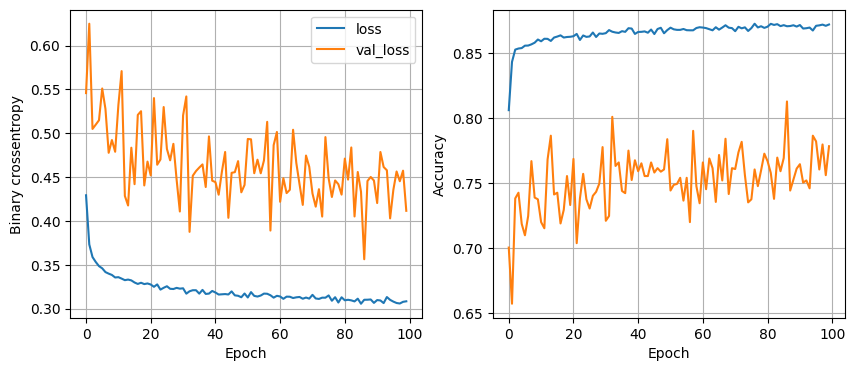

155/155 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8487
32 nodes, dropout 0.2, lr 0.005, batch size 64


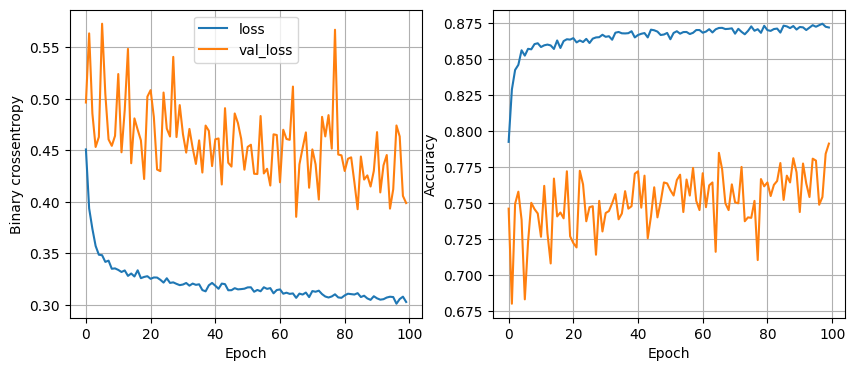

155/155 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8473
32 nodes, dropout 0.2, lr 0.005, batch size 128


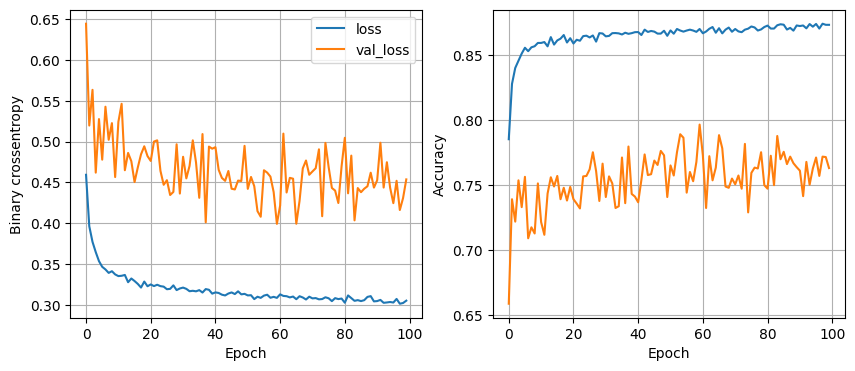

155/155 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8384
32 nodes, dropout 0.2, lr 0.001, batch size 32


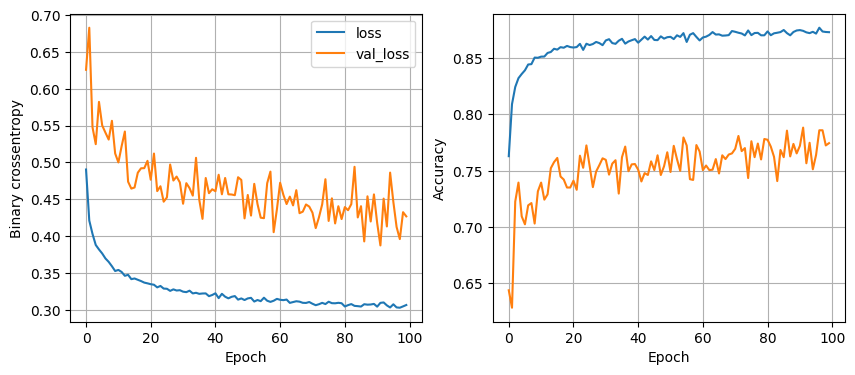

155/155 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8509
32 nodes, dropout 0.2, lr 0.001, batch size 64


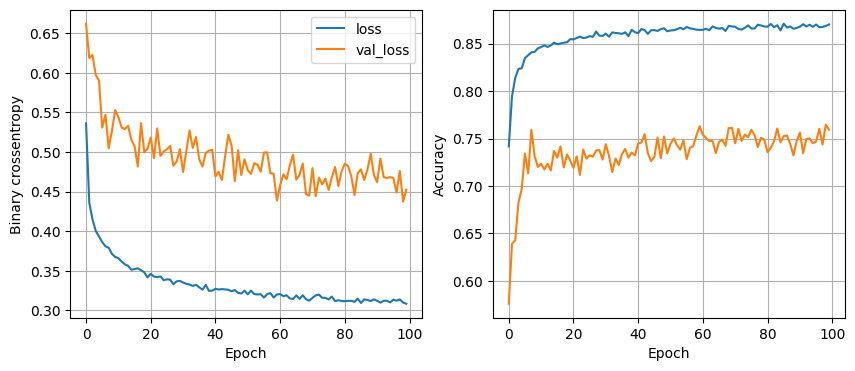

155/155 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8427
32 nodes, dropout 0.2, lr 0.001, batch size 128


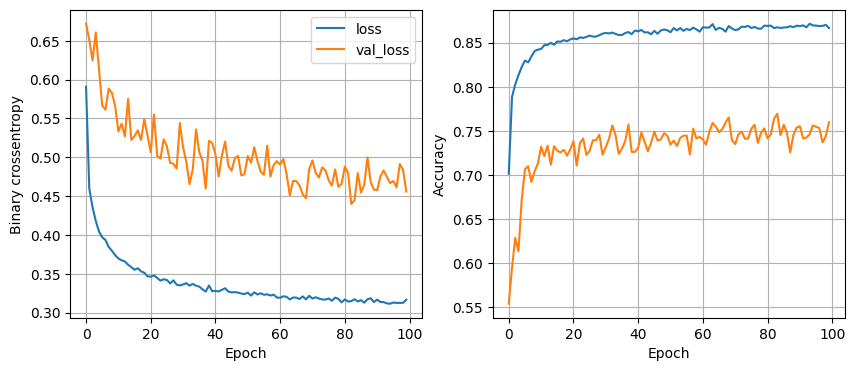

155/155 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.01, batch size 32


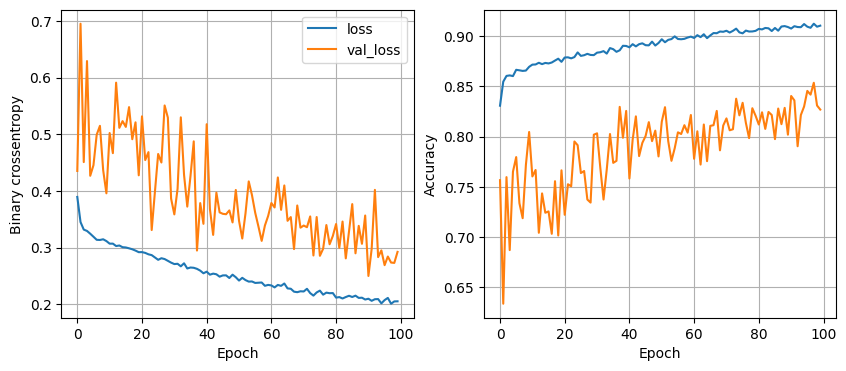

155/155 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8356
64 nodes, dropout 0, lr 0.01, batch size 64


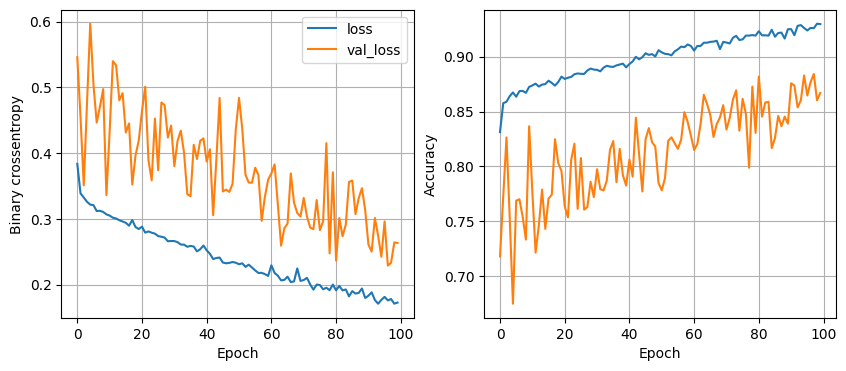

155/155 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8354
64 nodes, dropout 0, lr 0.01, batch size 128


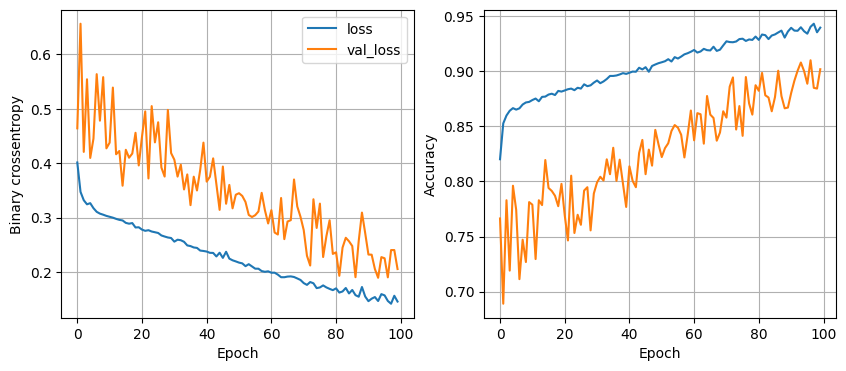

155/155 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.8368
64 nodes, dropout 0, lr 0.005, batch size 32


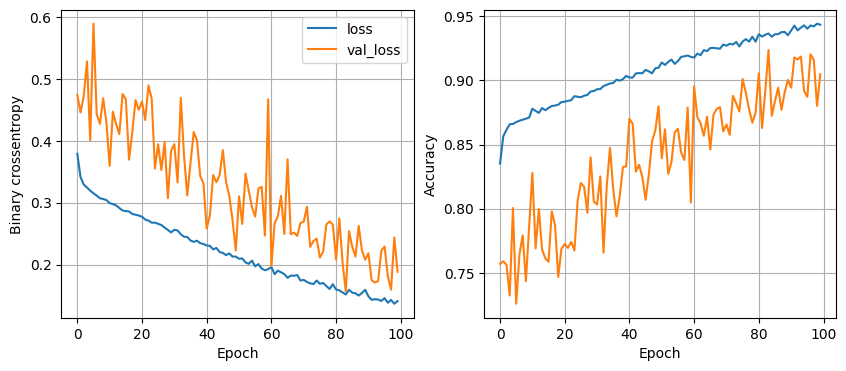

155/155 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.8372
64 nodes, dropout 0, lr 0.005, batch size 64


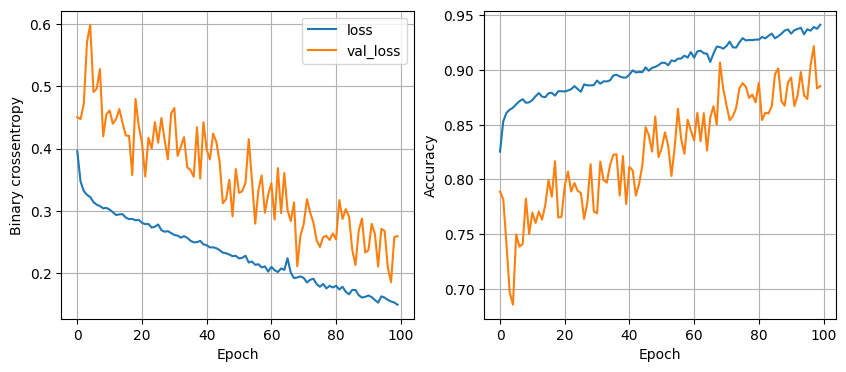

155/155 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.8447
64 nodes, dropout 0, lr 0.005, batch size 128


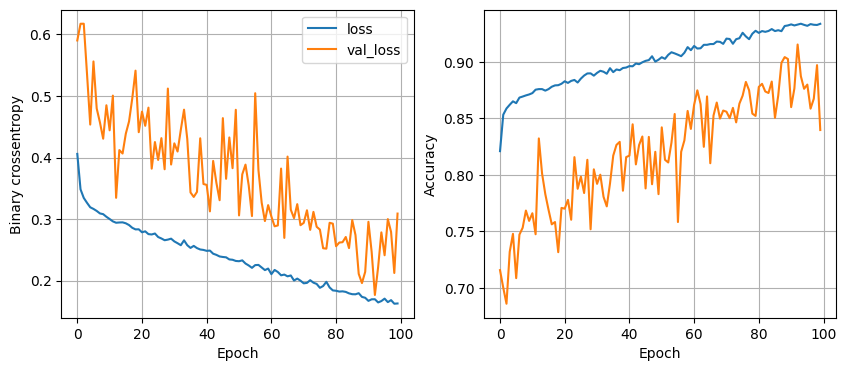

155/155 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8421
64 nodes, dropout 0, lr 0.001, batch size 32


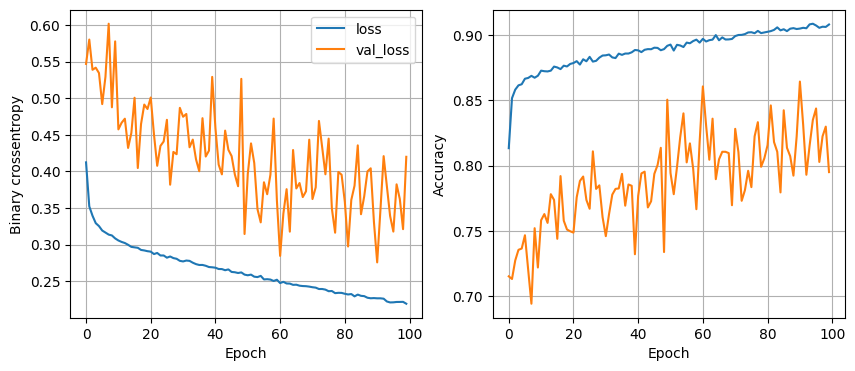

155/155 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8417
64 nodes, dropout 0, lr 0.001, batch size 64


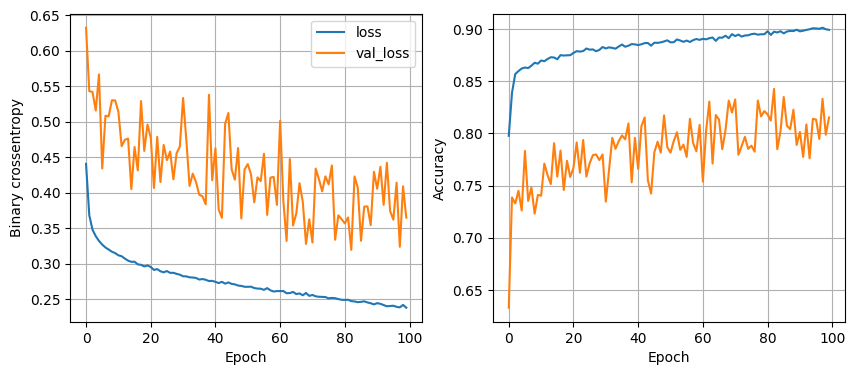

155/155 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8445
64 nodes, dropout 0, lr 0.001, batch size 128


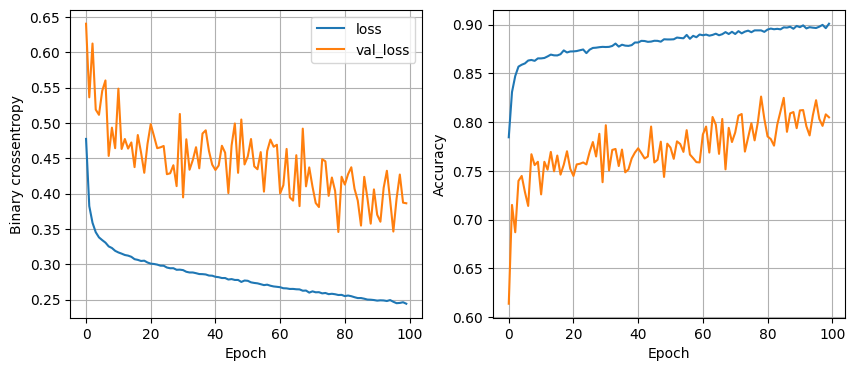

155/155 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8467
64 nodes, dropout 0.2, lr 0.01, batch size 32


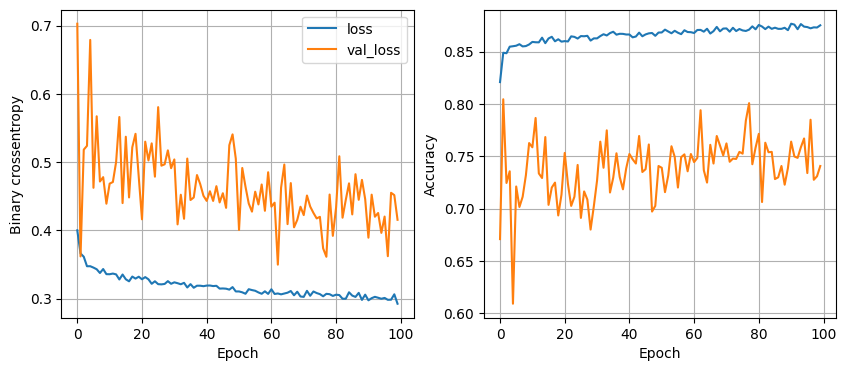

155/155 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8348
64 nodes, dropout 0.2, lr 0.01, batch size 64


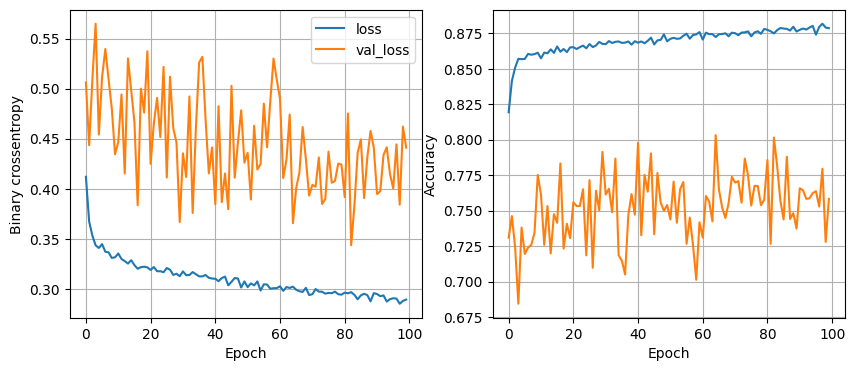

155/155 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8419
64 nodes, dropout 0.2, lr 0.01, batch size 128


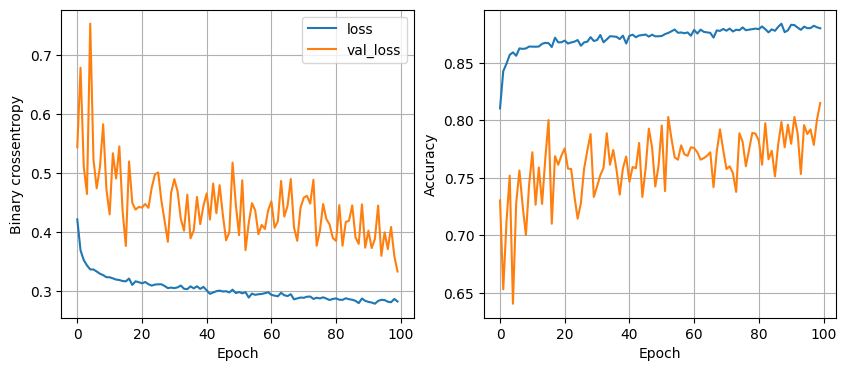

155/155 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8509
64 nodes, dropout 0.2, lr 0.005, batch size 32


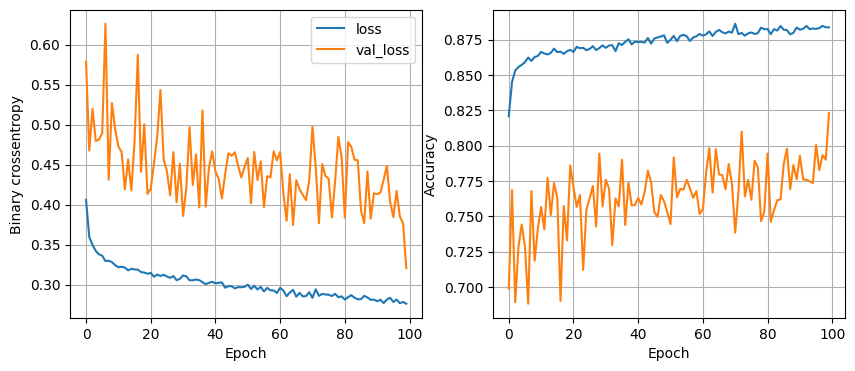

155/155 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8546
64 nodes, dropout 0.2, lr 0.005, batch size 64


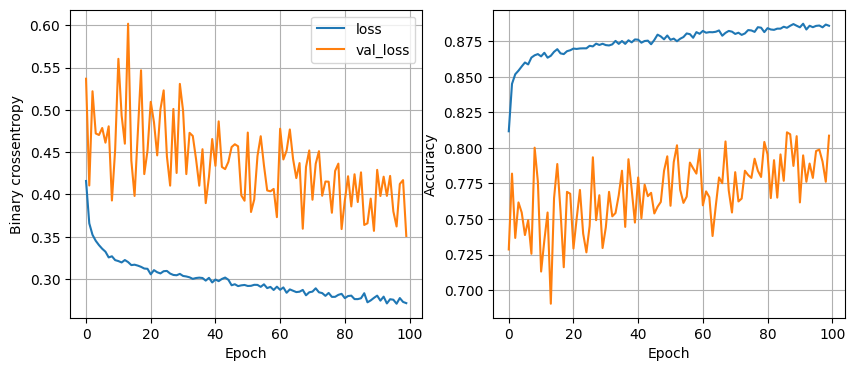

155/155 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8518
64 nodes, dropout 0.2, lr 0.005, batch size 128


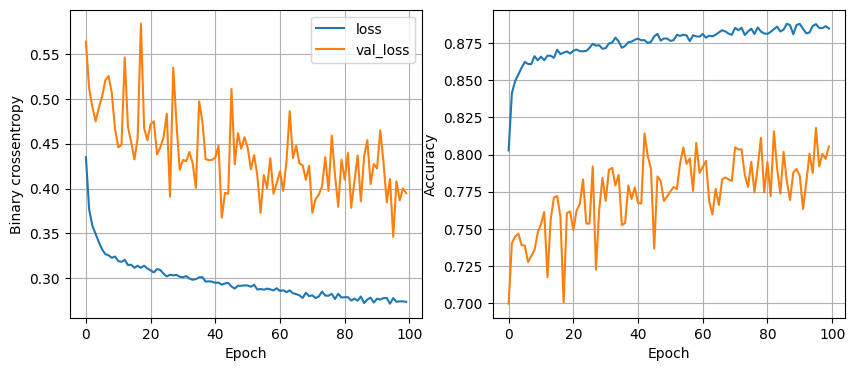

155/155 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8429
64 nodes, dropout 0.2, lr 0.001, batch size 32


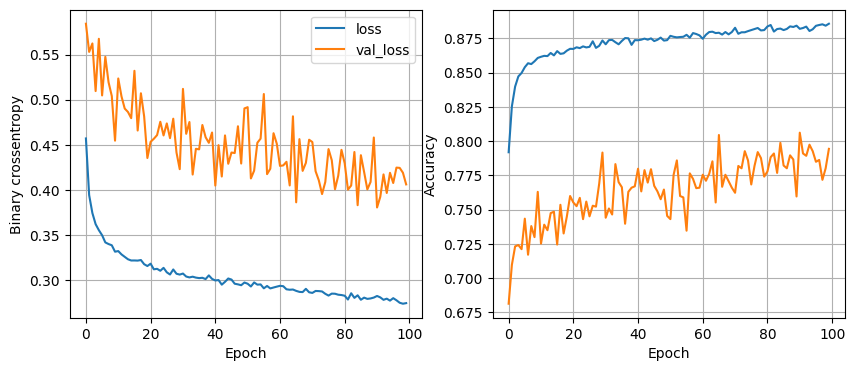

155/155 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.8487
64 nodes, dropout 0.2, lr 0.001, batch size 64


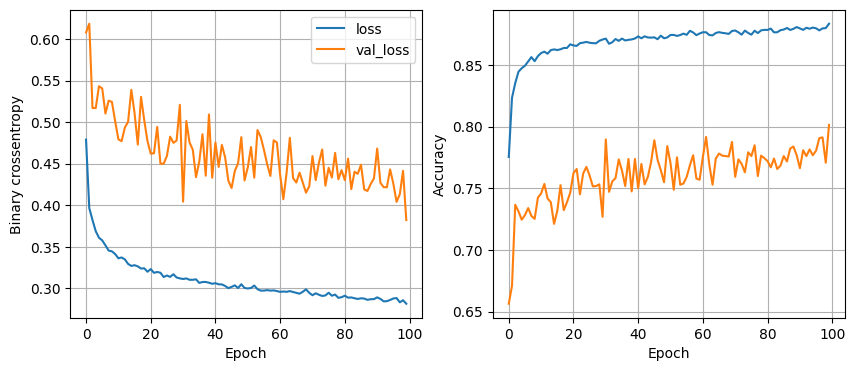

155/155 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8556
64 nodes, dropout 0.2, lr 0.001, batch size 128


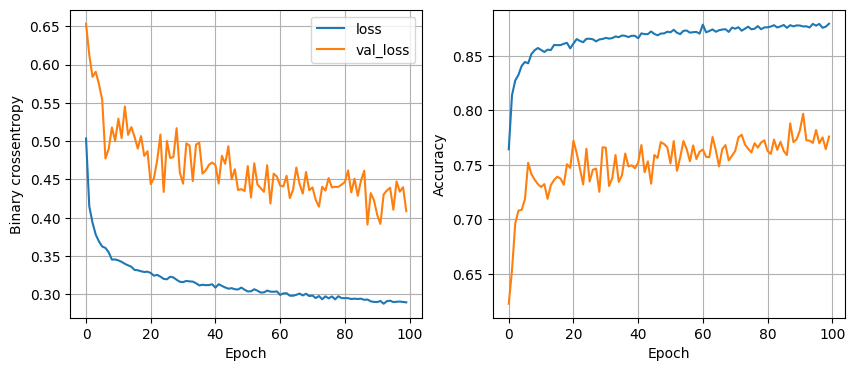

155/155 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8518


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_validation, y_validation)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
